# Librairies

In [11]:
#utilities
import os
import sys
from pathlib import Path
import json

#data science librairies
import numpy as np
import pandas as pd

# vizualisation libraires
import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/scripts")

#import librairies for technical analysis
from talib import MA, MACD, ADX, RSI, mass_index

In [18]:
data_path = "../data/raw/"
bnb_file = data_path+"data_BNB.csv"
btc_file = data_path+"data_BTC.csv"

tweet_btc = data_path+"bitcoin.json"
tweet_eth = data_path+"ethereum.json"
tweet_bnb = data_path+"binance.json"

#create a function
df_btc = pd.read_csv(btc_file)
df_btc['Date'] = pd.to_datetime(df_btc['Date'],unit="s")
#df_btc.index = df_btc['Date']
#del df_btc['Date']
del df_btc['Ignore']
# del df_btc['CloseTime']
df_btc

,Date,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06
...,...,...,...,...,...,...,...,...,...,...,...
1322,2021-03-31,58746.57,59800.00,56769.00,58740.55,60975.542666,1617235199999,3.575976e+09,1928224,31074.813187,1.823823e+09
1323,2021-04-01,58739.46,59490.00,57935.45,58720.44,47415.617220,1617321599999,2.789239e+09,1594431,22966.256736,1.351152e+09
1324,2021-04-02,58720.45,60200.00,58428.57,58950.01,47382.418781,1617407999999,2.811160e+09,1666356,23695.695154,1.406394e+09
1325,2021-04-03,58950.01,59791.72,56880.00,57051.94,47409.852113,1617494399999,2.783152e+09,1606805,23057.967017,1.353960e+09


In [19]:
df_btc.index[-1]

1326

In [20]:
df1=MA(df_btc, 7)
df1=MA(df1, 30)
df1=MA(df1, 100)
df1=ADX(df1,2,4)
df1=RSI(df1,14)
df1=MACD(df1,3,14)
df1 =mass_index(df1)
df1

,Date,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV,MA_7,MA_30,MA_100,ADX_2_4,RSI_14,MACD_3_14,MACDsign_3_14,MACDdiff_3_14,Mass Index
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,NaN,NaN,NaN,0.860061,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,2021-03-31,58746.57,59800.00,56769.00,58740.55,60975.542666,1617235199999,3.575976e+09,1928224,31074.813187,1.823823e+09,56148.104286,55011.602000,43321.8522,0.965914,0.700609,1903.077525,714.966142,1188.111383,24.012625
1323,2021-04-01,58739.46,59490.00,57935.45,58720.44,47415.617220,1617321599999,2.789239e+09,1594431,22966.256736,1.351152e+09,57209.055714,55354.261667,43670.9487,0.979334,0.700609,1850.487624,942.070439,908.417185,24.021030
1324,2021-04-02,58720.45,60200.00,58428.57,58950.01,47382.418781,1617407999999,2.811160e+09,1666356,23695.695154,1.406394e+09,57769.687143,55640.949667,44028.1212,0.867641,0.729101,1788.508492,1111.358049,677.150443,23.990213
1325,2021-04-03,58950.01,59791.72,56880.00,57051.94,47409.852113,1617494399999,2.783152e+09,1606805,23057.967017,1.353960e+09,57946.087143,55930.211333,44361.3486,0.854315,0.588222,946.457969,1078.378033,-131.920064,23.995856


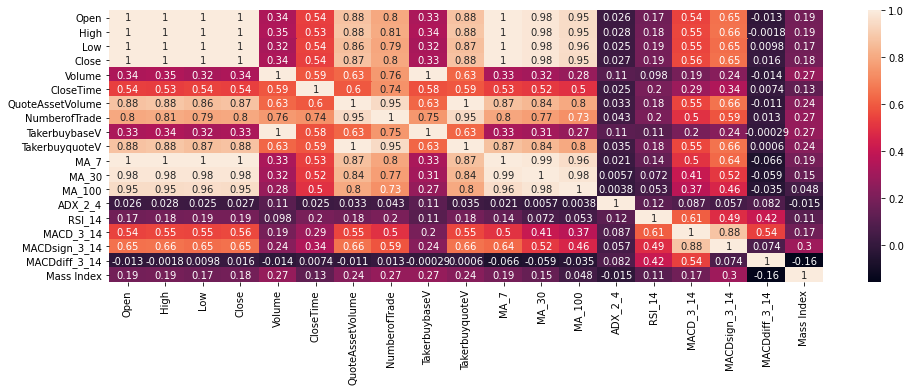

In [26]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(df1.corr(),annot=True)
plt.savefig("../plots/heatmap_btc.png", bbox_inches="tight",transparent=False)

## PCA : reduce dimensionality

In [34]:
from sklearn.decomposition import PCA # for PCA calculation
from sklearn.preprocessing import StandardScaler

X = df1.iloc[:,1:].dropna().values
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

pca = PCA()
X_pca = pca.fit(X_std)

Text(0, 0.5, 'cumulative explained variance')

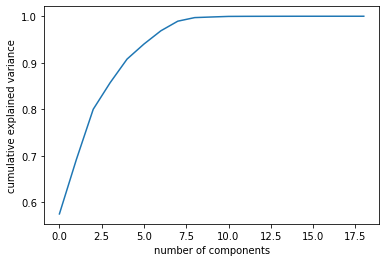

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [36]:
# need 8 compoenent for our analysis => re-do with tweet

num_components = 8
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_)

9


In [39]:
pd.DataFrame(pca.components_, columns = df1.iloc[:,1:].columns)


,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV,MA_7,MA_30,MA_100,ADX_2_4,RSI_14,MACD_3_14,MACDsign_3_14,MACDdiff_3_14,Mass Index
0,0.291531,0.292481,0.290499,0.291837,0.154416,0.192543,0.288360,0.277569,0.153176,0.288234,0.289880,0.281536,0.271242,0.010544,0.079023,0.188276,0.217377,0.010340,0.078886
1,-0.171943,-0.163899,-0.178172,-0.168325,0.520716,0.191058,0.093554,0.211473,0.523738,0.092300,-0.180858,-0.206783,-0.221266,0.106057,0.179384,0.086297,0.043162,0.104162,0.227019
2,0.009690,0.005409,-0.002747,-0.004916,0.203690,0.067225,0.065523,0.089651,0.194380,0.059197,0.043048,0.092262,0.104373,-0.103745,-0.513376,-0.501590,-0.307655,-0.505462,0.053906
3,0.003798,0.001455,-0.009489,-0.005298,-0.119564,-0.114438,-0.017543,-0.049598,-0.121924,-0.021190,0.013382,-0.057394,-0.152684,-0.401606,0.091397,0.086635,0.317615,-0.378308,0.711662
4,-0.029590,-0.029101,-0.017901,-0.021757,0.045645,0.202282,0.022054,0.071818,0.042626,0.023444,-0.040267,-0.015489,0.019259,-0.891455,0.020022,0.025855,-0.114576,0.255685,-0.264529
5,-0.025436,-0.042915,-0.014181,-0.038031,-0.112184,0.670661,-0.092506,0.034822,-0.132650,-0.102845,-0.004246,-0.044712,-0.037475,0.071939,0.417928,-0.117664,0.126225,-0.467849,-0.252247
6,-0.041111,-0.039691,-0.074641,-0.059839,0.089786,-0.400704,0.179428,0.021585,0.091658,0.175314,-0.032019,-0.135345,-0.116676,-0.077079,-0.103151,0.198270,0.462625,-0.400557,-0.532770
7,0.042434,0.052876,0.044636,0.043669,0.132967,-0.469774,-0.010633,-0.074374,0.154834,-0.005454,0.058271,0.109215,0.139208,-0.088997,0.701099,-0.300712,-0.274906,-0.143777,-0.051514
8,-0.100174,-0.076603,-0.123113,-0.094786,-0.319218,-0.016716,0.508875,0.305325,-0.295995,0.518466,-0.103153,-0.073350,-0.196819,0.052989,0.109193,-0.161282,-0.219598,0.049920,0.054430


In [42]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df1.iloc[:,1:].columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)

['High', 'TakerbuybaseV', 'RSI_14', 'Mass Index', 'ADX_2_4', 'CloseTime', 'Mass Index', 'RSI_14', 'TakerbuyquoteV']


## Create a LSTM model

In [51]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install tensorflow

     |████████████████████████████████| 173.9 MB 42 kB/s 
     |████████████████████████████████| 57 kB 761 kB/s 
     |████████████████████████████████| 3.3 MB 1.1 MB/s 
     |████████████████████████████████| 129 kB 1.1 MB/s 
     |████████████████████████████████| 10.6 MB 462 kB/s 
     |████████████████████████████████| 65 kB 430 kB/s 
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
     |████████████████████████████████| 42 kB 599 kB/s 
     |████████████████████████████████| 1.0 MB 518 kB/s 
     |████████████████████████████████| 462 kB 509 kB/s 
     |████████████████████████████████| 781 kB 570 kB/s 
     |████████████████████████████████| 142 kB 717 kB/s 
     |████████████████████████████████| 97 kB 1.1 MB/s 
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached cachetools-4.2.1-py3-none-any.whl (12 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [69]:
df_test = df1.copy()
df_test.index = df1["Date"]
del df_test["Date"]
df_test["log_return"] = np.log(df_test["Close"]/df_test["Close"].shift(1))
df_test = df_test.dropna()
df_test

,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV,MA_7,MA_30,MA_100,ADX_2_4,RSI_14,MACD_3_14,MACDsign_3_14,MACDdiff_3_14,Mass Index,log_return
Date,,,,,,,,,,,,,,,,,,,,
2017-11-24,8019.97,8369.00,7850.00,8138.00,4411.789112,1511567999999,3.584026e+07,19754,2166.425275,1.761335e+07,8070.765714,7033.504000,5270.6666,0.727995,0.553977,446.524609,501.376234,-54.851625,26.577659,0.014607
2017-11-25,8138.99,8734.78,8090.00,8700.01,4292.623682,1511654399999,3.609301e+07,18632,2294.923300,1.930690e+07,8204.775714,7128.112000,5314.8159,0.814984,0.654637,603.740204,521.849028,81.891175,26.518532,0.066780
2017-11-26,8700.04,9350.00,8604.72,9128.02,4147.380237,1511740799999,3.713853e+07,19268,2035.291755,1.822648e+07,8360.492857,7240.085000,5365.0124,0.879093,0.759828,788.554570,575.190137,213.364433,26.508287,0.048025
2017-11-27,9128.00,9654.28,9112.04,9650.00,4521.625707,1511827199999,4.296106e+07,22806,2433.447575,2.314532e+07,8565.921429,7371.097000,5420.1126,0.923549,0.795393,1007.463109,661.644731,345.818378,26.395585,0.055609
2017-11-28,9650.00,9939.00,9570.50,9896.80,4917.210985,1511913599999,4.823564e+07,18923,2431.138502,2.385114e+07,8819.820000,7495.324333,5478.2177,0.953726,0.823596,1125.652569,754.446299,371.206270,26.253509,0.025254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,58746.57,59800.00,56769.00,58740.55,60975.542666,1617235199999,3.575976e+09,1928224,31074.813187,1.823823e+09,56148.104286,55011.602000,43321.8522,0.965914,0.700609,1903.077525,714.966142,1188.111383,24.012625,-0.000102
2021-04-01,58739.46,59490.00,57935.45,58720.44,47415.617220,1617321599999,2.789239e+09,1594431,22966.256736,1.351152e+09,57209.055714,55354.261667,43670.9487,0.979334,0.700609,1850.487624,942.070439,908.417185,24.021030,-0.000342
2021-04-02,58720.45,60200.00,58428.57,58950.01,47382.418781,1617407999999,2.811160e+09,1666356,23695.695154,1.406394e+09,57769.687143,55640.949667,44028.1212,0.867641,0.729101,1788.508492,1111.358049,677.150443,23.990213,0.003902


In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1327 entries, 2017-08-17 to 2021-04-04
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              1327 non-null   float64
 1   High              1327 non-null   float64
 2   Low               1327 non-null   float64
 3   Close             1327 non-null   float64
 4   Volume            1327 non-null   float64
 5   CloseTime         1327 non-null   int64  
 6   QuoteAssetVolume  1327 non-null   float64
 7   NumberofTrade     1327 non-null   int64  
 8   TakerbuybaseV     1327 non-null   float64
 9   TakerbuyquoteV    1327 non-null   float64
 10  MA_7              1321 non-null   float64
 11  MA_30             1298 non-null   float64
 12  MA_100            1228 non-null   float64
 13  ADX_2_4           1323 non-null   float64
 14  RSI_14            1314 non-null   float64
 15  MACD_3_14         1314 non-null   float64
 16  MACDsign_3_14     1306 n

In [70]:
target = df_test['log_return'].copy()
target

Date
2017-11-24    0.014607
2017-11-25    0.066780
2017-11-26    0.048025
2017-11-27    0.055609
2017-11-28    0.025254
                ...   
2021-03-31   -0.000102
2021-04-01   -0.000342
2021-04-02    0.003902
2021-04-03   -0.032728
2021-04-04    0.019958
Name: log_return, Length: 1228, dtype: float64

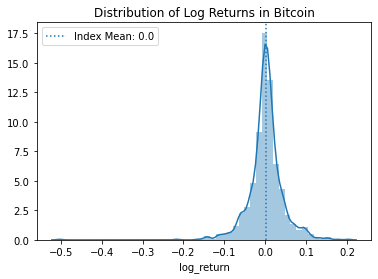

In [71]:
sns.distplot(target)
mean_return = target.mean()
plt.title('Distribution of Log Returns in Bitcoin')
plt.axvline(mean_return, ls=':', label='Index Mean: {}'.format(round(mean_return, 2)))
plt.legend()

In [81]:
#target = target.to_frame() => transform pandas series to dataframe

target.loc[target.log_return >= 0.05, 'class1'] = 1
target.loc[target.log_return < 0.05, 'class1'] = 0
target

,log_return,class1
Date,,
2017-11-24,0.014607,0.0
2017-11-25,0.066780,1.0
2017-11-26,0.048025,0.0
2017-11-27,0.055609,1.0
2017-11-28,0.025254,0.0
...,...,...
2021-03-31,-0.000102,0.0
2021-04-01,-0.000342,0.0
2021-04-02,0.003902,0.0


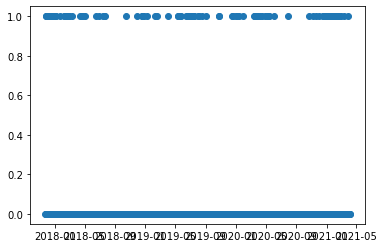

In [82]:
plt.scatter(target.index, target['class1'])

In [84]:
sum(target.class1)/len(target.class1) #essayer de regarder avec une autre crypto car les mouvements sont plus petits

0.08469055374592833

## Manage dataset tweet

In [3]:
def processDataTweet(db,name=None):
    tweets = []
    date = []
    usernames =[]
    list_tweet = []
    for line in open(db, 'r'):
        tweets.append(json.loads(line))

    for tweet in tweets:
        date.append(tweet['created_at'])
        usernames.append(tweet['username'])
        list_tweet.append(tweet['tweet'])

    data = {
        'Date':date,
        'username':usernames,
        'tweet':list_tweet
    }

    df = pd.DataFrame(data)
    df.to_csv(f'../data/processed/{name}_clean.csv',index=False)

processDataTweet(tweet_btc,'bitcoin')
processDataTweet(tweet_eth,'ethereum')
processDataTweet(tweet_bnb,'binance')

,date,username,tweet
0,2021-03-31 23:51:30 CEST,bashirahmaad,All investments carry risk. Never invest more ...
1,2021-03-31 22:30:03 CEST,binance,Check out the top #Binance Futures traders of ...
2,2021-03-31 21:00:01 CEST,binance,New languages now supported on https://t.co/Q...
3,2021-03-31 19:36:16 CEST,cz_binance,I am truly honored to be working with not only...
4,2021-03-31 18:22:37 CEST,binance,.@cz_binance x @TeletubbiesHQ? https://t.co/n...
...,...,...,...
5023,2017-08-23 13:52:23 CEST,binance,TRX(TRON) ICO - BNB Session on Binance exchang...
5024,2017-08-22 06:15:37 CEST,binance,The warm-up session of TRON sold out in 53 sec...
5025,2017-08-21 09:13:17 CEST,binance,【Binance Will Launch ICO Warm-up Session of TR...
5026,2017-08-18 19:57:48 CEST,binance,"Binance Will Add OAX, DNT, MCO, ICN https://t..."


In [8]:
df = pd.read_csv('../data/processed/binance_clean.csv')
df['date'] = pd.to_datetime(df['date'])
df

,date,username,tweet
0,2021-03-31 23:51:30+02:00,bashirahmaad,All investments carry risk. Never invest more ...
1,2021-03-31 22:30:03+02:00,binance,Check out the top #Binance Futures traders of ...
2,2021-03-31 21:00:01+02:00,binance,New languages now supported on https://t.co/Q...
3,2021-03-31 19:36:16+02:00,cz_binance,I am truly honored to be working with not only...
4,2021-03-31 18:22:37+02:00,binance,.@cz_binance x @TeletubbiesHQ? https://t.co/n...
...,...,...,...
5023,2017-08-23 13:52:23+02:00,binance,TRX(TRON) ICO - BNB Session on Binance exchang...
5024,2017-08-22 06:15:37+02:00,binance,The warm-up session of TRON sold out in 53 sec...
5025,2017-08-21 09:13:17+02:00,binance,【Binance Will Launch ICO Warm-up Session of TR...
5026,2017-08-18 19:57:48+02:00,binance,"Binance Will Add OAX, DNT, MCO, ICN https://t..."


In [9]:
bnb_df = df.copy()
bnb_df

,date,username,tweet
0,2021-03-31 23:51:30+02:00,bashirahmaad,All investments carry risk. Never invest more ...
1,2021-03-31 22:30:03+02:00,binance,Check out the top #Binance Futures traders of ...
2,2021-03-31 21:00:01+02:00,binance,New languages now supported on https://t.co/Q...
3,2021-03-31 19:36:16+02:00,cz_binance,I am truly honored to be working with not only...
4,2021-03-31 18:22:37+02:00,binance,.@cz_binance x @TeletubbiesHQ? https://t.co/n...
...,...,...,...
5023,2017-08-23 13:52:23+02:00,binance,TRX(TRON) ICO - BNB Session on Binance exchang...
5024,2017-08-22 06:15:37+02:00,binance,The warm-up session of TRON sold out in 53 sec...
5025,2017-08-21 09:13:17+02:00,binance,【Binance Will Launch ICO Warm-up Session of TR...
5026,2017-08-18 19:57:48+02:00,binance,"Binance Will Add OAX, DNT, MCO, ICN https://t..."


<AxesSubplot:>

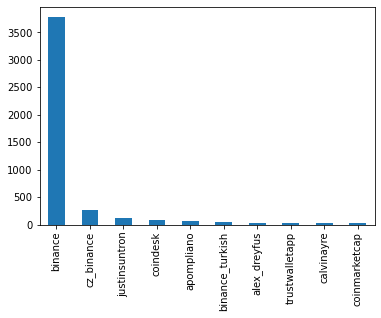

In [18]:
bnb_df.username.value_counts(sort=True).head(10).plot(kind='bar')

In [4]:
df = pd.read_csv('../data/processed/bitcoin_clean.csv')
df['date'] = pd.to_datetime(df['date'])
df

,date,username,tweet
0,2021-04-01 01:27:17+02:00,michael_saylor,#Gold doesn't work anymore. #Bitcoin broke i...
1,2021-04-01 01:00:12+02:00,technology,One Bitcoin transaction equals 75 gallons of g...
2,2021-04-01 01:00:07+02:00,bloombergtv,One Bitcoin transaction equals 75 gallons of g...
3,2021-04-01 00:49:28+02:00,cynthiamlummis,I spy with my laser eyes... #Bitcoin
4,2021-03-31 23:23:07+02:00,charliebilello,1. Stocks: all-time high 2. Home prices: all-t...
...,...,...,...
30004,2013-12-16 15:00:02+01:00,heineken,"Our vision of the future? Drink real beer, pay..."
30005,2013-12-16 00:41:08+01:00,cdixon,Bitcoin and the Byzantine Generals Problem ht...
30006,2013-12-15 20:23:15+01:00,benedictevans,It really ought to be possible to build a paym...
30007,2013-12-08 04:18:05+01:00,karaswisher,My Bitcoin Bummer — World’s Virtual Currency P...


In [19]:
btc_df = df.copy()
btc_df

,date,username,tweet
0,2021-04-01 01:27:17+02:00,michael_saylor,#Gold doesn't work anymore. #Bitcoin broke i...
1,2021-04-01 01:00:12+02:00,technology,One Bitcoin transaction equals 75 gallons of g...
2,2021-04-01 01:00:07+02:00,bloombergtv,One Bitcoin transaction equals 75 gallons of g...
3,2021-04-01 00:49:28+02:00,cynthiamlummis,I spy with my laser eyes... #Bitcoin
4,2021-03-31 23:23:07+02:00,charliebilello,1. Stocks: all-time high 2. Home prices: all-t...
...,...,...,...
30004,2013-12-16 15:00:02+01:00,heineken,"Our vision of the future? Drink real beer, pay..."
30005,2013-12-16 00:41:08+01:00,cdixon,Bitcoin and the Byzantine Generals Problem ht...
30006,2013-12-15 20:23:15+01:00,benedictevans,It really ought to be possible to build a paym...
30007,2013-12-08 04:18:05+01:00,karaswisher,My Bitcoin Bummer — World’s Virtual Currency P...


<AxesSubplot:>

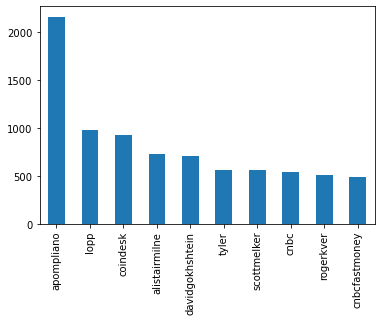

In [21]:
btc_df.username.value_counts(sort=True).head(10).plot(kind='bar')

<AxesSubplot:>

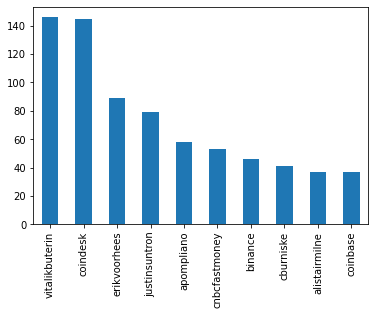

In [22]:
df = pd.read_csv('../data/processed/ethereum_clean.csv')
df['date'] = pd.to_datetime(df['date'])
eth_df = df.copy()
eth_df.username.value_counts(sort=True).head(10).plot(kind='bar')

<AxesSubplot:xlabel='date'>

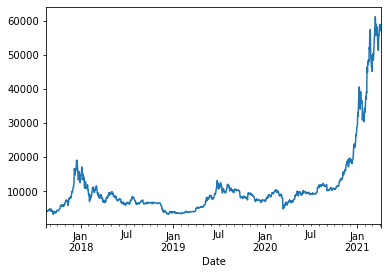

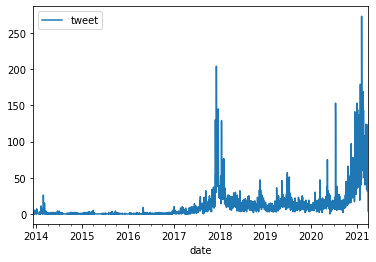

In [11]:
test = btc_df[['date','tweet']].groupby(['date']).count().resample("1D").sum()
df_btc['Close'].plot()
test.plot()

In [21]:
test.index = pd.to_datetime(test.index.values).date #convert date
test

,tweet
2013-12-06,1
2013-12-07,1
2013-12-08,0
2013-12-09,0
2013-12-10,0
...,...
2021-03-27,37
2021-03-28,45
2021-03-29,60
2021-03-30,62


<AxesSubplot:>

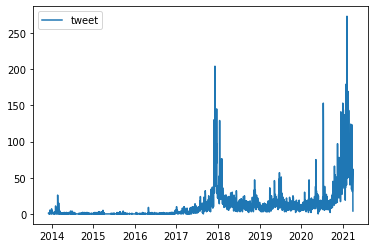

In [72]:
test.plot()

In [22]:
# merge dataset
merge_df = df_btc.join(test,lsuffix='_caller', rsuffix='_other')
merge_df


,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV,Ignore,tweet
Date,,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395,11.0
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409,2.0
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529,3.0
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084,1.0
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,58746.57,59800.00,56769.00,58740.55,60975.542666,1617235199999,3.575976e+09,1928224,31074.813187,1.823823e+09,0.000000,4.0
2021-04-01,58739.46,59490.00,57935.45,58720.44,47415.617220,1617321599999,2.789239e+09,1594431,22966.256736,1.351152e+09,0.000000,NaN
2021-04-02,58720.45,60200.00,58428.57,58950.01,47382.418781,1617407999999,2.811160e+09,1666356,23695.695154,1.406394e+09,0.000000,NaN


<AxesSubplot:xlabel='Date'>

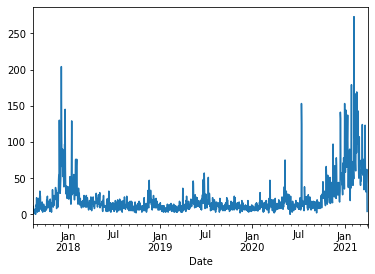

In [24]:
merge_df['tweet'].plot() # petit problème de database mais sinon ça a merge

<AxesSubplot:xlabel='Date'>

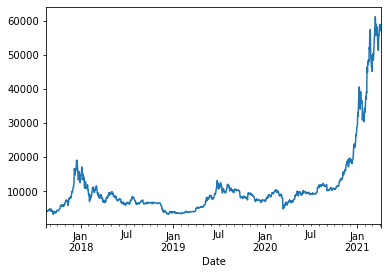

In [25]:
merge_df['Close'].plot()